<a href="https://colab.research.google.com/github/Ronbragaglia/ColabPython/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_C%C3%B3pia_de_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sompy

  Preparing metadata (setup.py) ... done
  Created wheel for sompy: filename=sompy-0.1.1-py2.py3-none-any.whl size=3070 sha256=71782df29cb034717a4ad991a978958b1ed839d865e08332e614a64c002d321f
  Stored in directory: /root/.cache/pip/wheels/50/85/af/94367aaed698ba839da64b695d569dde3b96330151993b26fd
Successfully built sompy


In [ ]:
pip install ucimlrepo

In [ ]:
pip install minisom

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


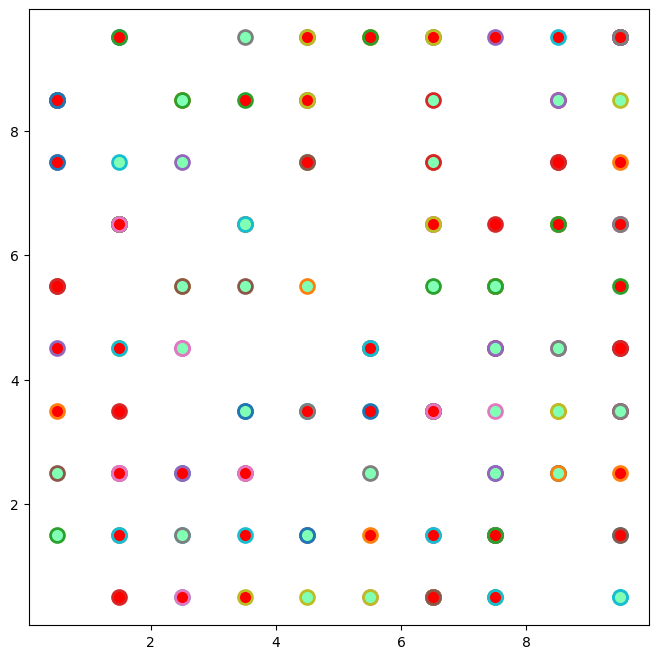

Cluster Labels:
1-6    10
6-0     8
9-9     8
7-1     7
6-3     6
       ..
0-4     1
9-5     1
9-7     1
5-3     1
3-1     1
Name: cluster, Length: 76, dtype: int64


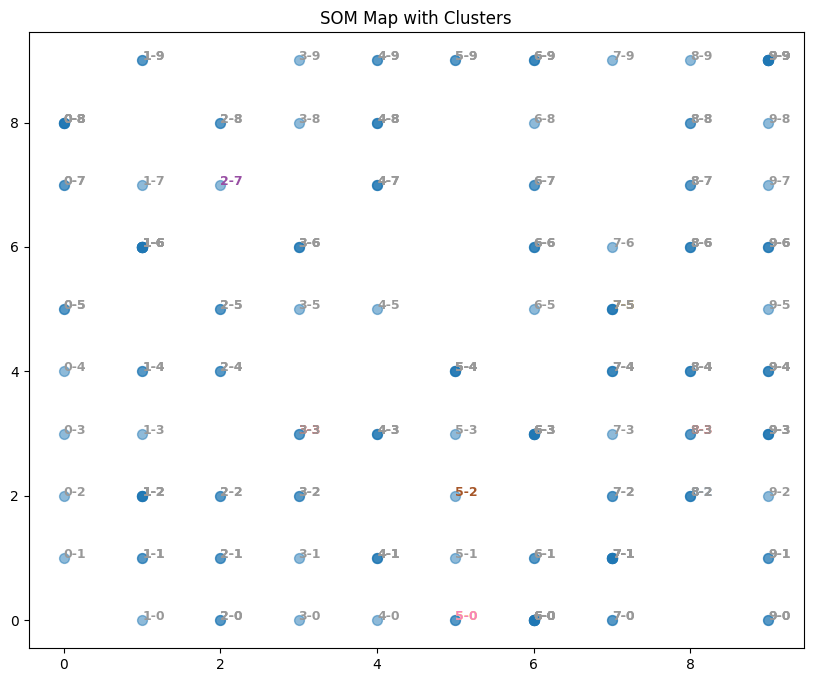

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = fetch_openml(name='wine' , version=1)
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

SOM = MiniSom(x=10, y=10, input_len=len(X.columns), sigma=1.0, learning_rate=0.5)
SOM.random_weights_init(X_scaled)
SOM.train_random(data=X_scaled, num_iteration=100)


plt.figure(figsize=(8, 8))
for i, x in enumerate(X_scaled):
  w = SOM.winner(x)
  plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.rainbow(int(y[i])/2.0), markersize=10, markeredgewidth=2)
plt.title
plt.show()

cluster_labels = np.array([SOM.winner(x) for x in X_scaled])

df = pd.DataFrame(data=cluster_labels, columns=['x_cluster' , 'y_cluster'])

df['cluster'] = [str(label[0]) +'-' + str(label[1]) for label in cluster_labels]


print("Cluster Labels:")
print(df['cluster'].value_counts())

plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(cluster_labels):
    plt.text(x, y, str(df['cluster'][i]), color=plt.cm.Set1(i / len(np.unique(cluster_labels))), fontdict={'weight': 'bold', 'size': 9})

plt.scatter(*zip(*cluster_labels), s=50, alpha=0.5)
plt.title('SOM Map with Clusters')
plt.show()